# 다중분류 - Iris 품종 예측 

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf

seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리 


In [2]:
iris = pd.read_csv("dataset/iris.csv",header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# iris 품종 라벨인코딩 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_iris = encoder.fit_transform(iris.iloc[:,-1].values)

In [4]:
# iris 품종 원핫인코딩
from tensorflow.keras.utils import to_categorical
y_onehot = to_categorical(y_iris)
y_onehot[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [5]:
# 데이터 정규화 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(iris.iloc[:,:-1].values)

In [6]:
# one-hot vector의 경우 y_train의 y를 대문자로 쓴다. 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y_onehot, stratify=y_onehot, random_state=seed)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

### 모델 정의 / 설정 / 학습 / 평가 

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
# 아웃풋의 경우, iris분류가 총 3종류이므로 아웃풋도 3이 되어야 한다.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=500, batch_size=30, verbose=0)

In [12]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 999us/step - loss: 0.1545 - accuracy: 0.9737


[0.15449602901935577, 0.9736841917037964]

### 모델 save/load 

In [13]:
model.save('model/iris_model.h5')

In [14]:
from tensorflow.keras.models import load_model
my_model = load_model('model/iris_model.h5')

### 훈련 과정 시각화 

In [15]:
import matplotlib.pylab as plt
%matplotlib inline

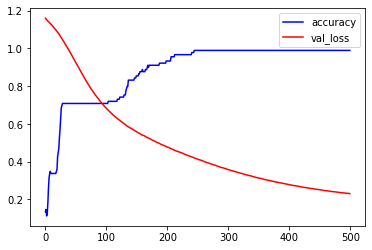

In [16]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, 'b-',markersize=5, label='accuracy')
plt.plot(x_len, y_vloss, 'r-',markersize=5, label='val_loss')
plt.legend()
plt.show()

val_loss가 계속 내려가고 있는 것으로 보아, 아직 학습할 수 있는 여지가 있다는 것을 의미한다. 